In [2]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup

import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [4]:
# Read the city data file and store it in a pandas DataFrame.

city_data_df = pd.read_csv(city_data_to_load)
city_data_df

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
...,...,...,...
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural


In [5]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277


### Get the null values from city_data dataframe


In [8]:
# Get the columns and the rows that are not null.
city_data_df.count()
city_data_df.isnull().count()

city            120
driver_count    120
type            120
dtype: int64

### Get the data types of each column.

In [9]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

### Get the unique values of the type of city.

In [10]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

### # Get the number of data points for each type of city.

In [11]:
sum(city_data_df["type"] == "Urban")

66

In [12]:
sum(city_data_df["type"] == "Suburban")

36

In [13]:
sum(city_data_df["type"] == "Rural")

18

### Get the null values from ride_data dataframe

In [15]:
ride_data_df.count()
ride_data_df.isnull().sum()


city       0
date       0
fare       0
ride_id    0
dtype: int64

### Get the data types of each column.

In [16]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

## Merge DataFrames

In [19]:
# Combine the data into a single dataset

pyber_data_df = pd.merge(ride_data_df , city_data_df , how ="left", on=["city", "city"])
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


## create three separate DataFrames, one for each type of city.

In [20]:
# Create the Urban city DataFrame.

urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [26]:
# Create the Suburban and Rural city DataFrames.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

suburban_cities_df
rural_cities_df

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


## get the number of rides for each city by each type of city

In [28]:
# Get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [29]:
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [30]:
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

## get the average fare for each city by each type of city

In [31]:
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [32]:
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [33]:
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

## Get the Average Number of Drivers for Each City Type

In [35]:
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [36]:
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [37]:
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

## Urban bubble chart

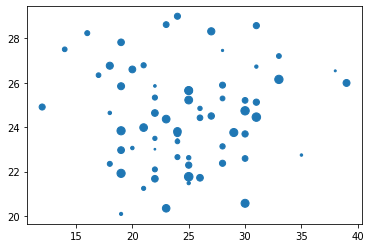

In [39]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count, urban_avg_fare, s = urban_driver_count )

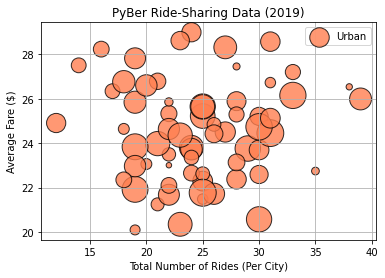

In [45]:
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s = 10*urban_driver_count, c = "coral",
            edgecolor = "Black" , linewidths=1,
            alpha=0.8, label="Urban"
           )

plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid()
plt.legend()

## SubUrban bubble chart

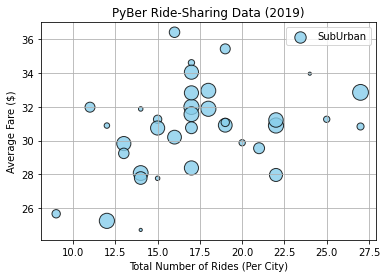

In [48]:
plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s = 10*suburban_driver_count, c = "skyblue",
            edgecolor = "Black" , linewidths=1,
            alpha=0.8, label="SubUrban"
           )

plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid()
plt.legend()

## Rural bubble chart

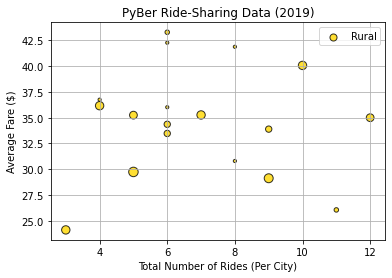

In [49]:
plt.scatter(rural_ride_count,
            rural_avg_fare,
            s= 10*rural_driver_count, c = "gold",
            edgecolor = "black", linewidths = 1,
            alpha = 0.8, label = "Rural"
            )

plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid()
plt.legend()

# Create a Bubble Chart for All Cities

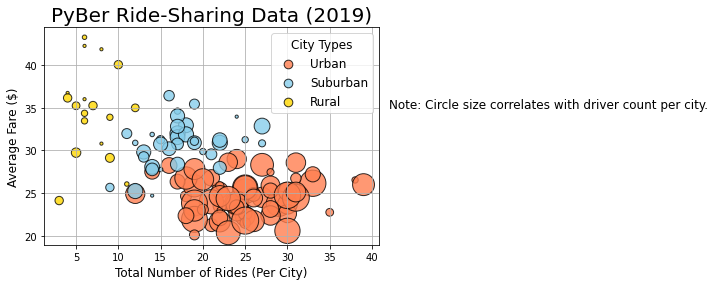

In [61]:
# Add the scatter charts for each type of city.
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# # Add the legend.
# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Save the figure.
plt.savefig("analysis/Fig1.png")

# # Show the plot
plt.show()


# Summary Statistics for Number of Rides by City Type

In [62]:
# Get summary statistics.
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [64]:
# Get summary statistics.
suburban_cities_df.describe()
# Get summary statistics.
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


## Summary statistics of the ride count for each city type

In [68]:
# Get summary statistics.
urban_ride_count.describe()
suburban_ride_count.describe()
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [69]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [70]:
# Calculate the median of the ride count for each city type.
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [71]:
# Calculate the mode of the ride count for each city type.
round(urban_ride_count.mode(),2), round(suburban_ride_count.mode(),2), round(rural_ride_count.mode(),2)

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [80]:
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

In [85]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count:.2f}.")


The mean for the ride counts for urban trips is 24.62.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).
The median for the ride counts for urban trips is 24.00.


In [87]:
# Calculate the measures of central tendency for the ride count for the suburban cities.
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_suburban_ride_count:.2f}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_suburban_ride_count}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for urban trips is {median_suburban_ride_count:.2f}.")


The mean for the ride counts for urban trips is 17.36.
The mode for the ride counts for urban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).
The median for the ride counts for urban trips is 17.00.


In [88]:
# Calculate the measures of central tendency for the ride count for the suburban cities.
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count:.2f}.")


The mean for the ride counts for rural trips is 6.94.
The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).
The median for the ride counts for rural trips is 6.00.


## Summary Statistics for the Fare by City Type

In [96]:
# Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]
urban_fares.head()

suburban_fares = suburban_cities_df["fare"]
rural_fares = rural_cities_df["fare"]


In [92]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [98]:
# for Suburban Cities
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(urban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

# for Rural Cities
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([22.86]), count=array([5])).
The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


# Summary Statistics for the Number of Drivers by City Type

In [100]:
# Get the driver count data from the urban cities.
urban_drivers = urban_cities_df['driver_count']
urban_drivers.head()

suburban_drivers = suburban_cities_df['driver_count']

rural_drivers = rural_cities_df['driver_count']



In [101]:
# Calculate the measures of central tendency for the average no if drivers for the urban cities.
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean no of drivers for urban trips is {mean_urban_drivers:.2f}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median no of drivers for urban trips is {median_urban_drivers:.2f}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode no of drivers for urban trips is {mode_urban_drivers}.")

# for Suburban Cities
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean no of drivers for suburban trips is {mean_suburban_drivers:.2f}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The median no of drivers for suburban trips is {median_suburban_drivers:.2f}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode no of drivers for suburban trips is {mode_suburban_drivers}.")

# for Rural Cities
mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean no of drivers for rural trips is {mean_rural_fares:.2f}.")

median_rural_drivers = np.median(rural_drivers)
print(f"The median no of drivers for rural trips is {median_rural_drivers:.2f}.")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode no of drivers for rural trips is {mode_rural_drivers}.")

The mean no of drivers for urban trips is $36.68.
The median no of drivers for urban trips is $37.00.
The mode no of drivers for urban trips is ModeResult(mode=array([39], dtype=int64), count=array([86])).
The mean no of drivers for suburban trips is $13.71.
The median no of drivers for suburban trips is $16.00.
The mode no of drivers for suburban trips is ModeResult(mode=array([20], dtype=int64), count=array([79])).
The mean no of drivers for rural trips is $34.62.
The median no of drivers for rural trips is $4.00.
The mode no of drivers for rural trips is ModeResult(mode=array([1], dtype=int64), count=array([32])).


# Create Box-and-Whisker Plots

## Box-and-Whisker Plots for Ride Count Data

In [1]:
# Create a box-and-whisker plot for the urban cities ride count.

x_labels = ["Urban"]
fig , ax = plt.subplots()

ax.boxplot(urban_ride_count, labels = x_labels)

# Add the tiles y axis label and grid

ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(10,41, step=2.0))
ax.grid()
plt.show()


NameError: name 'plt' is not defined

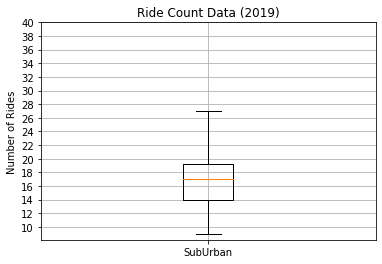

In [110]:
# Create a box-and-whisker plot for the suburban cities ride count.

x_labels = ["SubUrban"]
fig , ax = plt.subplots()

ax.boxplot(suburban_ride_count, labels = x_labels)

# Add the tiles y axis label and grid

ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(10,41, step=2.0))
ax.grid()
plt.show()


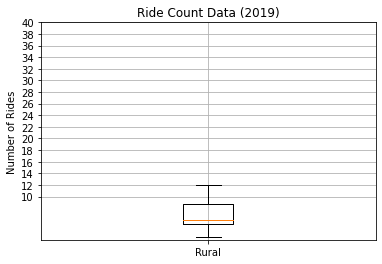

In [111]:
# Create a box-and-whisker plot for the rural cities ride count.

x_labels = ["Rural"]
fig , ax = plt.subplots()

ax.boxplot(rural_ride_count, labels = x_labels)

# Add the tiles y axis label and grid

ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(10,41, step=2.0))
ax.grid()
plt.show()

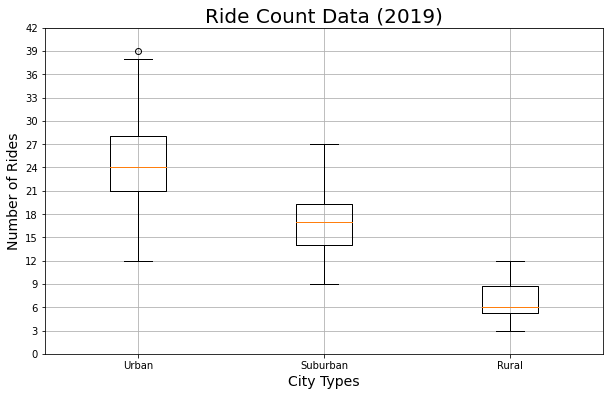

In [112]:
# Add all ride count box-and-whisker plots to the same graph.

x_labels = ["Urban", "Suburban","Rural"]

ride_count_data = [urban_ride_count,suburban_ride_count , rural_ride_count]
fig , ax = plt.subplots(figsize =(10,6))
ax.boxplot(ride_count_data, labels = x_labels)

# Add the tiles y axis label and grid

ax.set_title("Ride Count Data (2019)", fontsize=20)
ax.set_ylabel("Number of Rides",fontsize=14)
ax.set_xlabel("City Types", fontsize =14)
ax.set_yticks(np.arange(0,45, step=3.0))
ax.grid()

# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

In [113]:
urban_ride_count

city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64

In [114]:
# Get the city that matches 39

urban_city_outlier = urban_ride_count[urban_ride_count == 39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


## Box-and-Whisker Plots for Ride fare Data

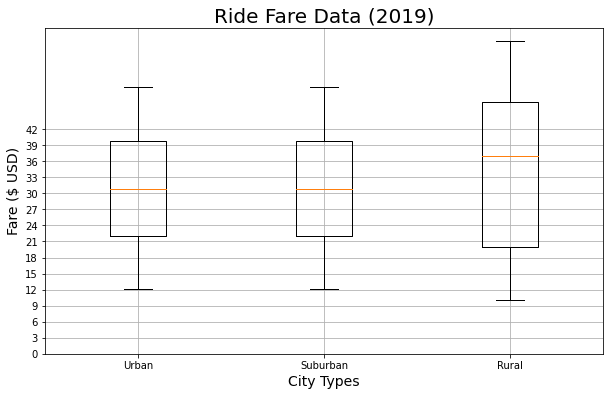

In [115]:
# Create a box-and-whisker plot for the urban fare data.

x_labels = ["Urban", "Suburban","Rural"]

ride_fare_data = [suburban_fares, suburban_fares , rural_fares]


fig , ax = plt.subplots(figsize =(10,6))
ax.boxplot(ride_fare_data, labels = x_labels)

# Add the tiles y axis label and grid

ax.set_title("Ride Fare Data (2019)", fontsize=20)
ax.set_ylabel("Fare ($ USD)",fontsize=14)
ax.set_xlabel("City Types", fontsize =14)
ax.set_yticks(np.arange(0,45, step=3.0))
ax.grid()

# Save the figure.
plt.savefig("analysis/Fig3.png")
plt.show()

## Box-and-Whisker Plots for Driver Count Data

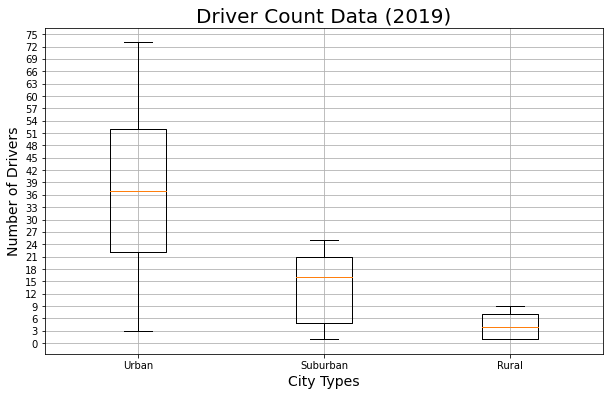

Summary Statistics


In [118]:
# Create a box-and-whisker plot for the urban fare data.

x_labels = ["Urban", "Suburban","Rural"]

ride_driver_data = [urban_drivers, suburban_drivers , rural_drivers]

fig , ax = plt.subplots(figsize =(10,6))
ax.boxplot(ride_driver_data, labels = x_labels)

# Add the tiles y axis label and grid

ax.set_title("Driver Count Data (2019)", fontsize=20)
ax.set_ylabel("Number of Drivers",fontsize=14)
ax.set_xlabel("City Types", fontsize =14)
ax.set_yticks(np.arange(0,78, step=3.0))
ax.grid()

# Save the figure.
plt.savefig("analysis/Fig4.png")
plt.show()
print("Summary Statistics")


## Get the Percentage of Fares for Each City Type

In [119]:
# Get the sum of the fares for each city type.

sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [120]:
# Get the sum of all the fares.
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [121]:
# Calculate the percentage of fare for each city type

type_percent = sum_fares_by_type / total_fares * 100
type_percent

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

### Pie Chart for the Percentage of Fares by City Type

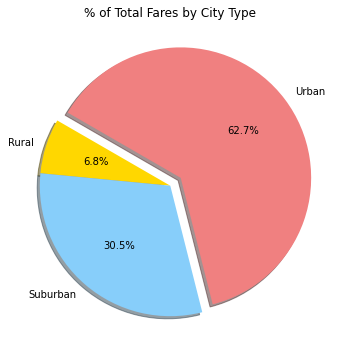

In [126]:
# Build the percentage of fares by city type pie chart.
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl

# Build Pie Chart

plt.subplots(figsize=(10, 6))
plt.pie(type_percent,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig5.png")
# Show Figure
plt.show()

### Pie Chart for the Percentage of total rides by City Type

In [127]:
# Get the sum of the total rides for each city type.

sum_rides_by_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
sum_rides_by_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [132]:
# Get the sum of all the rides.
total_rides = pyber_data_df["ride_id"].count()
total_rides

2375

In [133]:
# Calculate the percentage of  total rides for each city type

ride_percent = sum_rides_by_type / total_rides * 100
ride_percent

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

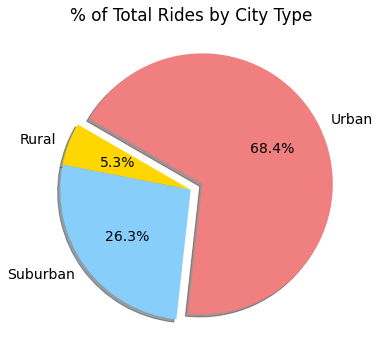

In [135]:
# Build the percentage of total rides by city type pie chart.
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl

# Build Pie Chart

plt.subplots(figsize=(10, 6))
plt.pie(ride_percent,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig6.png")
# Show Figure
plt.show()

### Pie Chart for the Percentage of Total drivers by City Type

In [140]:
# Get the sum of the total drivers for each city type.

sum_drivers_by_type = city_data_df.groupby(["type"]).sum()["driver_count"]
sum_drivers_by_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [141]:
# Get the sum of all the drivers.
total_drivers = city_data_df["driver_count"].sum()
total_drivers

2973

In [143]:
# Calculate the percentage of  total drivers for each city type

driver_percent = sum_drivers_by_type / total_drivers * 100
driver_percent

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

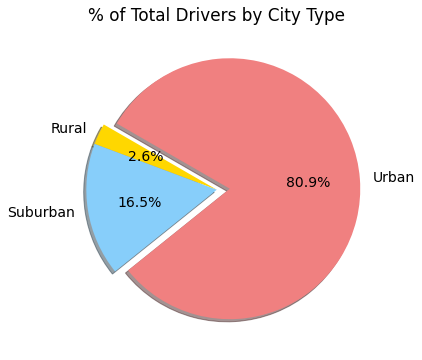

In [144]:
# Build the percentage of total rides by city type pie chart.
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl

# Build Pie Chart

plt.subplots(figsize=(10, 6))
plt.pie(driver_percent,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig7.png")
# Show Figure
plt.show()